In [237]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [238]:
# Create a synthetic dataset
np.random.seed(42)
x = np.linspace(-1, 1, 100)
y = np.sin(5 * x) + np.random.normal(0, 0.1, x.shape)

In [239]:
# Split into training and validation sets
train_x = x[:80]
train_y = y[:80]
val_x = x[80:]
val_y = y[80:]

# Convert to PyTorch tensors
train_x_tensor = torch.tensor(train_x, dtype=torch.float32).view(-1, 1)
train_y_tensor = torch.tensor(train_y, dtype=torch.float32).view(-1, 1)
val_x_tensor = torch.tensor(val_x, dtype=torch.float32).view(-1, 1)
val_y_tensor = torch.tensor(val_y, dtype=torch.float32).view(-1, 1)

In [240]:
torch.manual_seed(42)

In [241]:
# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.fc2 = nn.Linear(100, 500)
        self.fc3 = nn.Linear(500, 100)
        self.fc4 = nn.Linear(100, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [242]:
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [243]:
# Train the model
epochs = 10000
train_losses = []
val_losses = []

In [244]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(train_x_tensor)
    loss = criterion(output, train_y_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_output = model(val_x_tensor)
        val_loss = criterion(val_output, val_y_tensor)
        val_losses.append(val_loss.item())

    if epoch % 1000 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

Epoch 1/10000, Training Loss: 0.5753661394119263, Validation Loss: 7.478983402252197
Epoch 1001/10000, Training Loss: 0.006147503852844238, Validation Loss: 0.1227497085928917
Epoch 2001/10000, Training Loss: 0.005925267934799194, Validation Loss: 0.026957262307405472
Epoch 3001/10000, Training Loss: 0.0049914466217160225, Validation Loss: 0.2168388068675995
Epoch 4001/10000, Training Loss: 0.004077714402228594, Validation Loss: 5.426943778991699
Epoch 5001/10000, Training Loss: 0.0030631967820227146, Validation Loss: 10.099383354187012
Epoch 6001/10000, Training Loss: 0.0025779404677450657, Validation Loss: 10.37343978881836
Epoch 7001/10000, Training Loss: 0.0019008787348866463, Validation Loss: 10.604680061340332
Epoch 8001/10000, Training Loss: 0.002102609258145094, Validation Loss: 11.309679985046387
Epoch 9001/10000, Training Loss: 0.0015857841353863478, Validation Loss: 21.86919593811035


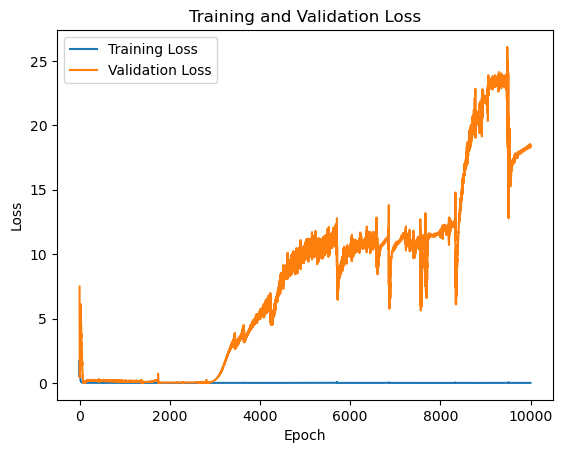

In [245]:
# Plot the training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

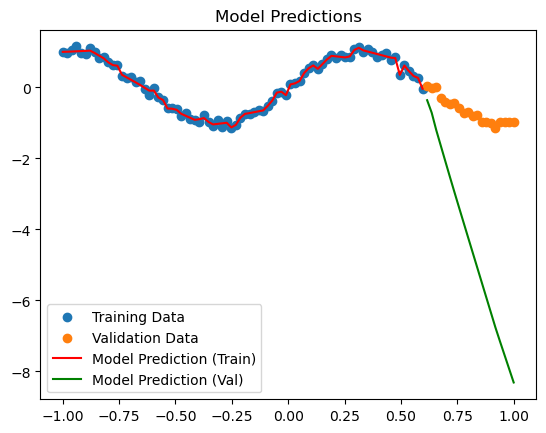

In [246]:
# Plot the model predictions
model.eval()
with torch.no_grad():
    train_pred = model(train_x_tensor).numpy()
    val_pred = model(val_x_tensor).numpy()

plt.scatter(train_x, train_y, label='Training Data')
plt.scatter(val_x, val_y, label='Validation Data')
plt.plot(train_x, train_pred, label='Model Prediction (Train)', color='red')
plt.plot(val_x, val_pred, label='Model Prediction (Val)', color='green')
plt.legend()
plt.title('Model Predictions')
plt.show()